In [155]:
import tensorflow as tf
from tensorflow.keras import datasets
import matplotlib.pyplot as plt 
import cv2

# Load CIFAR-10 dataset
# (x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Print the shapes of the datasets
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [29]:
class_names = [
    "airplane", 
    "automobile", 
    "bird", 
    "cat", 
    "deer", 
    "dog", 
    "frog", 
    "horse", 
    "ship", 
    "truck"
]

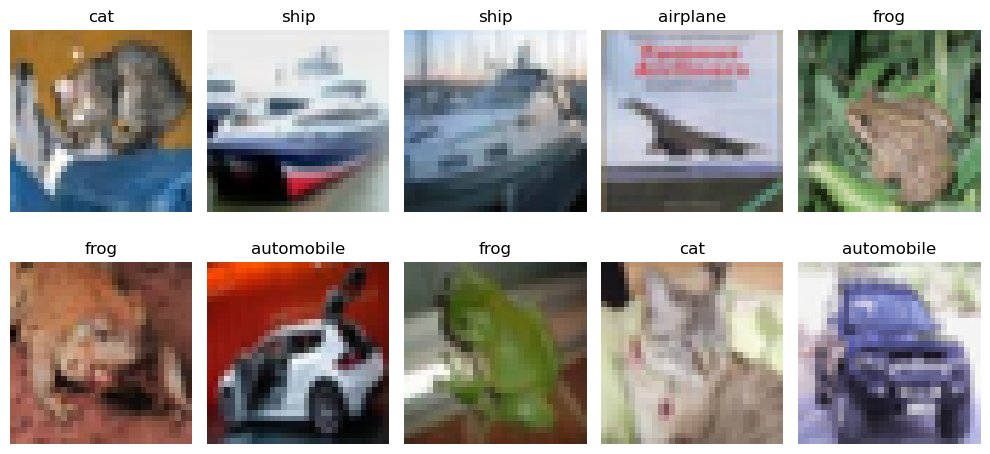

In [57]:
plt.figure(figsize=(10, 5))
for i in range(0, 10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i])
    plt.title(class_names[int(y_test[i][0])])
    plt.axis('off')

plt.tight_layout()
plt.show()

In [55]:
scaled = x_train[0] / 255.0

1.0

In [59]:
# scaling the data 
x_train = x_train / 255.0
x_test = x_test / 255.0

In [86]:
x_train.shape

(50000, 32, 32, 3)

Text(0.5, 1.0, 'frog')

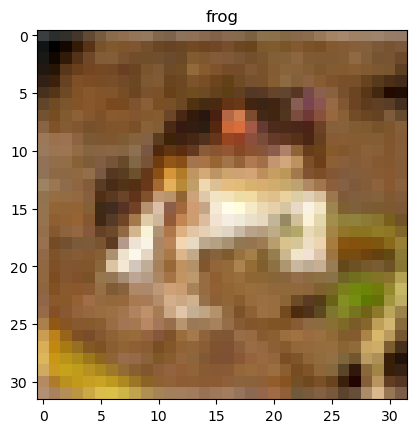

In [75]:
plt.imshow(x_train[0])
plt.title(class_names[int(y_train[0][0])])

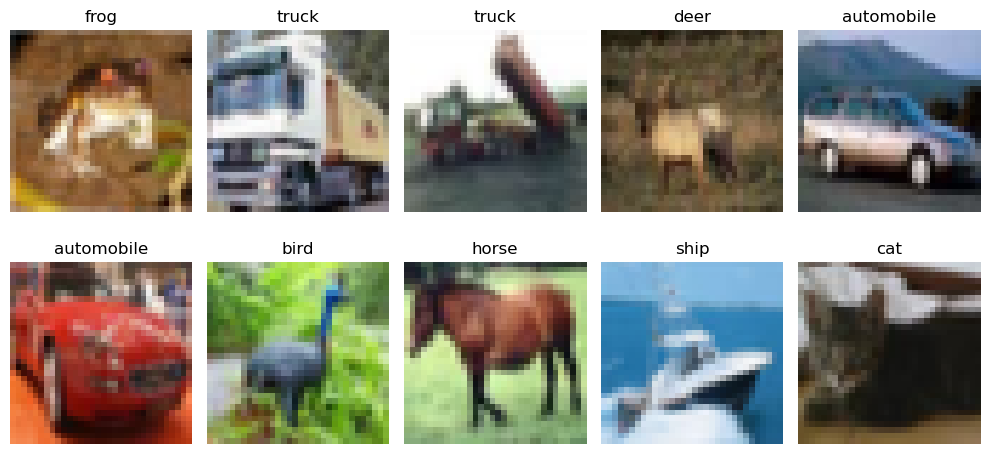

In [80]:
plt.figure(figsize=(10, 5))
for i in range(0, 10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i])
    plt.title(class_names[int(y_train[i][0])])
    plt.axis('off')

plt.tight_layout()
plt.show()

In [179]:
# create a model 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPool2D, Dense, Flatten, Dropout, Input

model = Sequential()
model.add(Input(shape=(32, 32, 3)))

model.add(Conv2D(128, (3,3), 1, activation='relu'))
model.add(MaxPool2D())

model.add(Conv2D(64, (3,3), 1, activation='relu'))
model.add(MaxPool2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPool2D())

model.add(Flatten())

model.add(Dense(526, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [181]:
model.compile('adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_30 (Conv2D)                   │ (None, 30, 30, 128)         │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_29 (MaxPooling2D)      │ (None, 15, 15, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 13, 13, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_30 (MaxPooling2D)      │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_32 (Conv2D)                   │ (None, 4, 4, 32)            │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_31 (MaxPooling2D)      │ (None, 2, 2, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 526)                 │          67,854 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 256)                 │         134,912 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 301,176 (1.15 MB)

 Trainable params: 301,176 (1.15 MB)

 Non-trainable params: 0 (0.00 B)

In [183]:
logdir = 'logs'

In [185]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [189]:
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size= 32, epochs=40, callbacks=[tensorboard_callback])

Epoch 1/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 153s 98ms/step - accuracy: 0.5902 - loss: 1.1530 - val_accuracy: 0.6077 - val_loss: 1.1061
Epoch 2/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 159s 102ms/step - accuracy: 0.6408 - loss: 1.0170 - val_accuracy: 0.6442 - val_loss: 1.0163
Epoch 3/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 160s 102ms/step - accuracy: 0.6666 - loss: 0.9416 - val_accuracy: 0.6577 - val_loss: 0.9827
Epoch 4/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 155s 99ms/step - accuracy: 0.6969 - loss: 0.8582 - val_accuracy: 0.6763 - val_loss: 0.9236
Epoch 5/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 153s 98ms/step - accuracy: 0.7177 - loss: 0.7935 - val_accuracy: 0.6714 - val_loss: 0.9579
Epoch 6/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 153s 98ms/step - accuracy: 0.7345 - loss: 0.7527 - val_accuracy: 0.6836 - val_loss: 0.9221
Epoch 7/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 153s 98ms/step - accuracy: 0.7497 - loss: 0.7084 - val_accuracy: 0.6891 - val_loss: 0.9065
Epoch 8/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 153s 98ms/step - accuracy

In [191]:
model.save("cifar.keras")
model.save_weights('cifar.weights.h5')

In [193]:
model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step


array([[9.2807613e-02, 6.3732378e-02, 4.3684408e-02, ..., 4.3555987e-03,
        6.0705598e-02, 1.1802328e-02],
       [4.1414250e-09, 8.3576761e-06, 4.0504757e-21, ..., 2.3215694e-21,
        9.9999166e-01, 2.3182336e-09],
       [4.9075898e-02, 2.9128405e-01, 9.9645240e-06, ..., 1.5163280e-09,
        6.4587891e-01, 1.3751045e-02],
       ...,
       [1.9726470e-15, 6.1662684e-14, 3.9291823e-10, ..., 1.0758853e-05,
        3.3108460e-20, 2.5403074e-11],
       [5.5125373e-08, 9.9999976e-01, 9.8357656e-16, ..., 4.5675225e-10,
        5.6157168e-10, 2.5340267e-07],
       [0.0000000e+00, 4.7637299e-31, 1.3952356e-26, ..., 1.0000000e+00,
        3.5858063e-34, 1.6380127e-32]], dtype=float32)